<a href="https://colab.research.google.com/github/mmurray2727/business-summer-research/blob/master/ProblemSet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem for Submission
Term life insurance emperical analysis
by Mackenzie Murray

1. DATA OVERVIEW AND EXPLORATORY ANALYSIS

In [ ]:
# @title
# ME 315 Machine Learning Application - Life Insurance Data Analysis
# Mackenzie Murray

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('/Term Life Insurance.csv')


# Basic dataset information
print(f"Dataset Shape: {df.shape}")
print(f"Number of features: {df.shape[1]}")
print(f"Number of observations: {df.shape[0]}")

print("\nDataset Summary Statistics:")
print(df.describe().round(2))

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (500, 18)
Number of features: 18
Number of observations: 500

Dataset Summary Statistics:
       GENDER     AGE  MARSTAT  EDUCATION  ETHNICITY  SMARSTAT  SGENDER  \
count  500.00  500.00   500.00     500.00     500.00    500.00   500.00   
mean     0.83   47.16     0.79      14.06       1.60      1.20     1.45   
std      0.38   13.85     0.54       2.94       1.38      0.87     0.89   
min      0.00   20.00     0.00       2.00       1.00      0.00     0.00   
25%      1.00   37.00     0.00      12.00       1.00      0.00     0.00   
50%      1.00   47.00     1.00      14.00       1.00      1.00     2.00   
75%      1.00   58.00     1.00      16.00       2.00      2.00     2.00   
max      1.00   85.00     2.00      17.00       7.00      3.00     2.00   

         SAGE  SEDUCATION   NUMHH       INCOME    TOTINCOME     CHARITY  \
count  500.00      500.00  500.00       500.00       500.00      500.00   
mean    33.40       10.02    2.87    321021.90    803513.20    34088.

Data Analysis

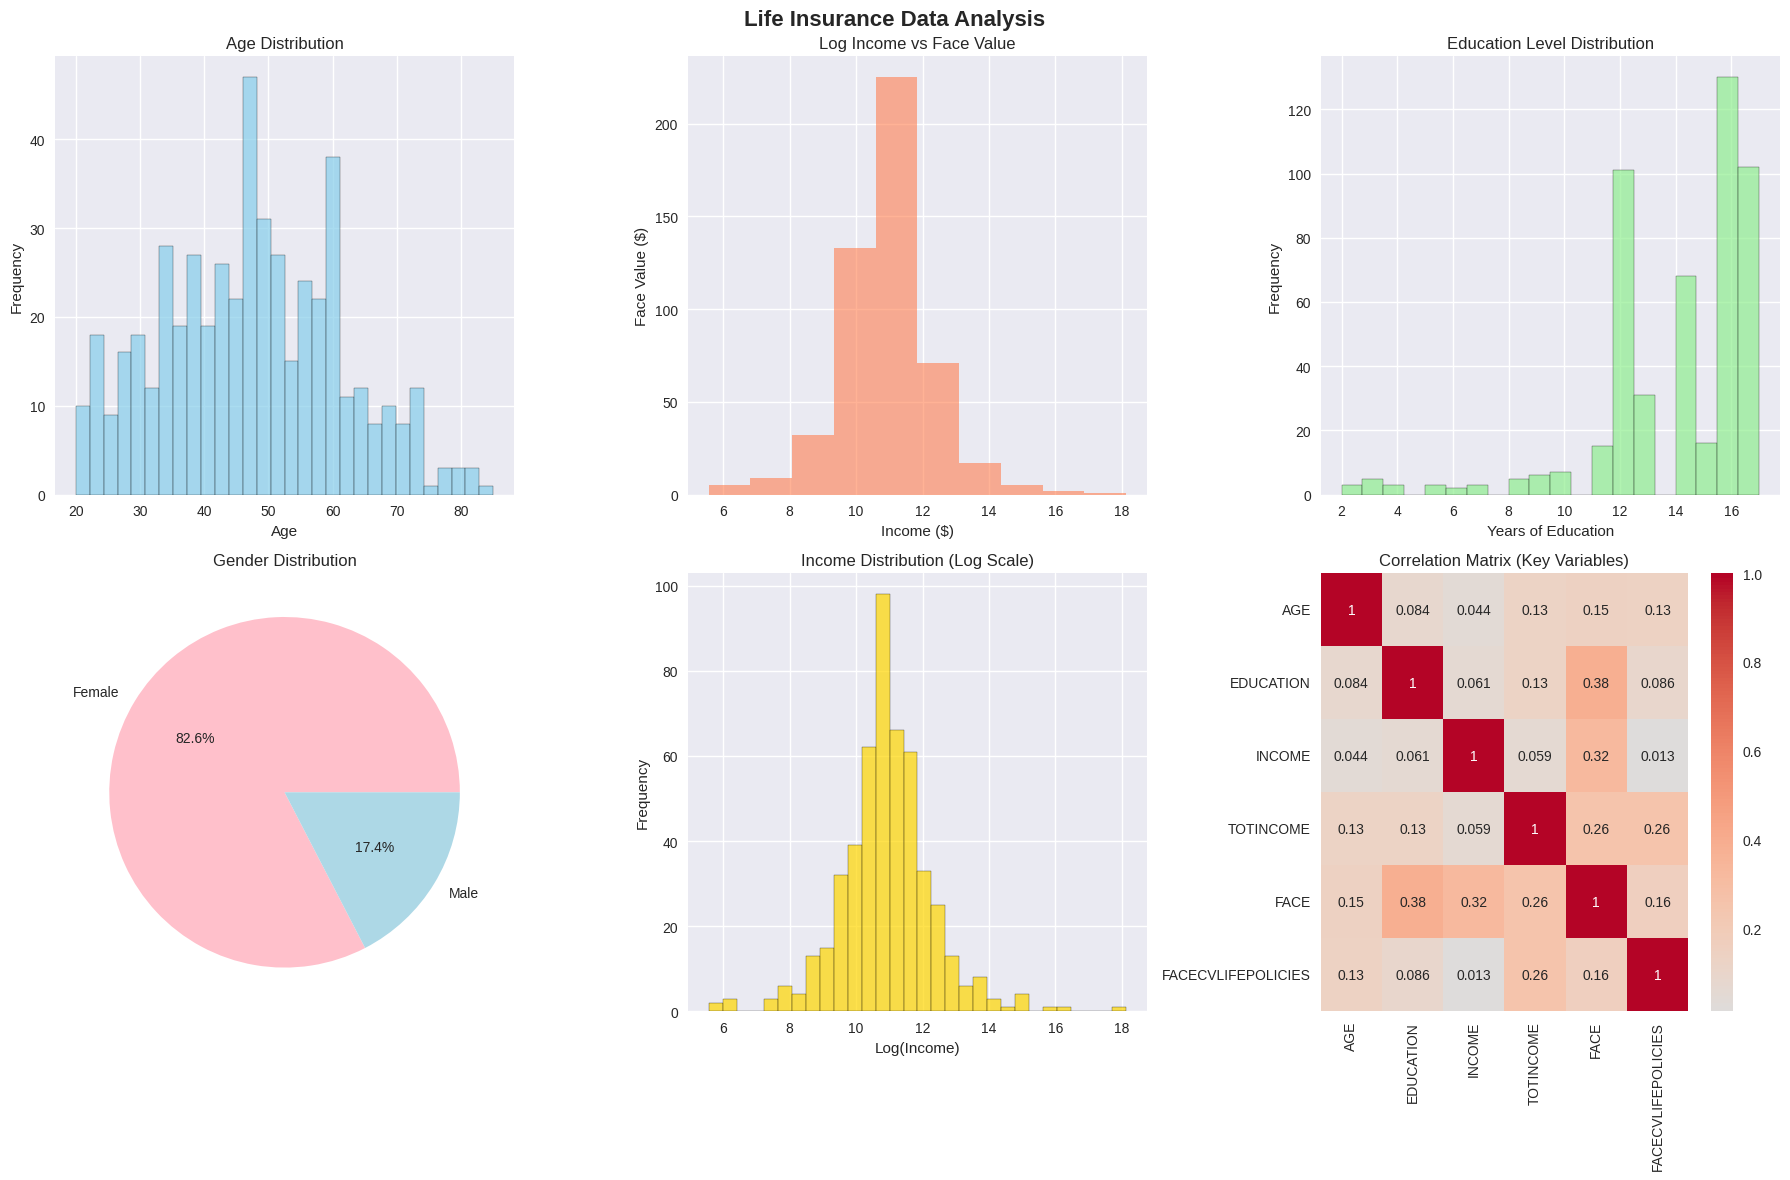


Scatterplot Matrix Analysis:


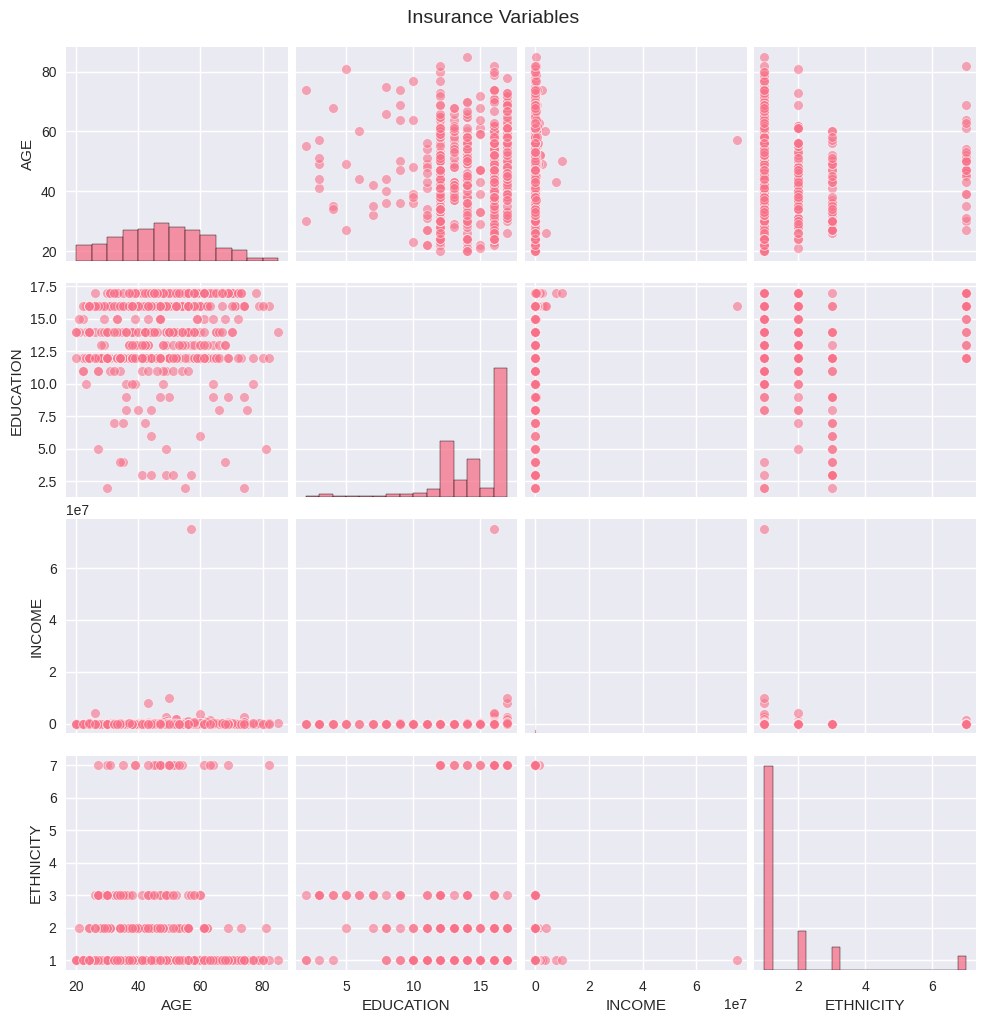

In [ ]:
# Create figure for multiple plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Life Insurance Data Analysis', fontsize=16, fontweight='bold')

# 1. Age distribution
axes[0,0].hist(df['AGE'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')


# 3. Education level distribution
axes[0,2].hist(df['EDUCATION'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,2].set_title('Education Level Distribution')
axes[0,2].set_xlabel('Years of Education')
axes[0,2].set_ylabel('Frequency')

# 4. Gender distribution
gender_counts = df['GENDER'].value_counts()
axes[1,0].pie(gender_counts.values, labels=['Female', 'Male'], autopct='%1.1f%%',
              colors=['pink', 'lightblue'])
axes[1,0].set_title('Gender Distribution')

# 2. Income vs Face Value histogram
axes[0,1].hist(np.log(df['INCOME'], df['FACE']), alpha=0.6, color='coral')
axes[0,1].set_title('Log Income vs Face Value')
axes[0,1].set_xlabel('Income ($)')
axes[0,1].set_ylabel('Face Value ($)')


# 5. Income distribution (log scale)
axes[1,1].hist(np.log(df['INCOME']), bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[1,1].set_title('Income Distribution (Log Scale)')
axes[1,1].set_xlabel('Log(Income)')
axes[1,1].set_ylabel('Frequency')

# 6. Correlation heatmap (subset of variables)
correlation_vars = ['AGE', 'EDUCATION', 'INCOME', 'TOTINCOME', 'FACE', 'FACECVLIFEPOLICIES']
corr_matrix = df[correlation_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,2])
axes[1,2].set_title('Correlation Matrix (Key Variables)')

plt.tight_layout()
plt.show()

# Scatterplot Matrix for key variables
print("\nScatterplot Matrix Analysis:")
key_vars = ['AGE', 'EDUCATION', 'INCOME', 'ETHNICITY',]
sns.pairplot(df[key_vars], diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Insurance Variables', y=1.02, fontsize=14)
plt.show()


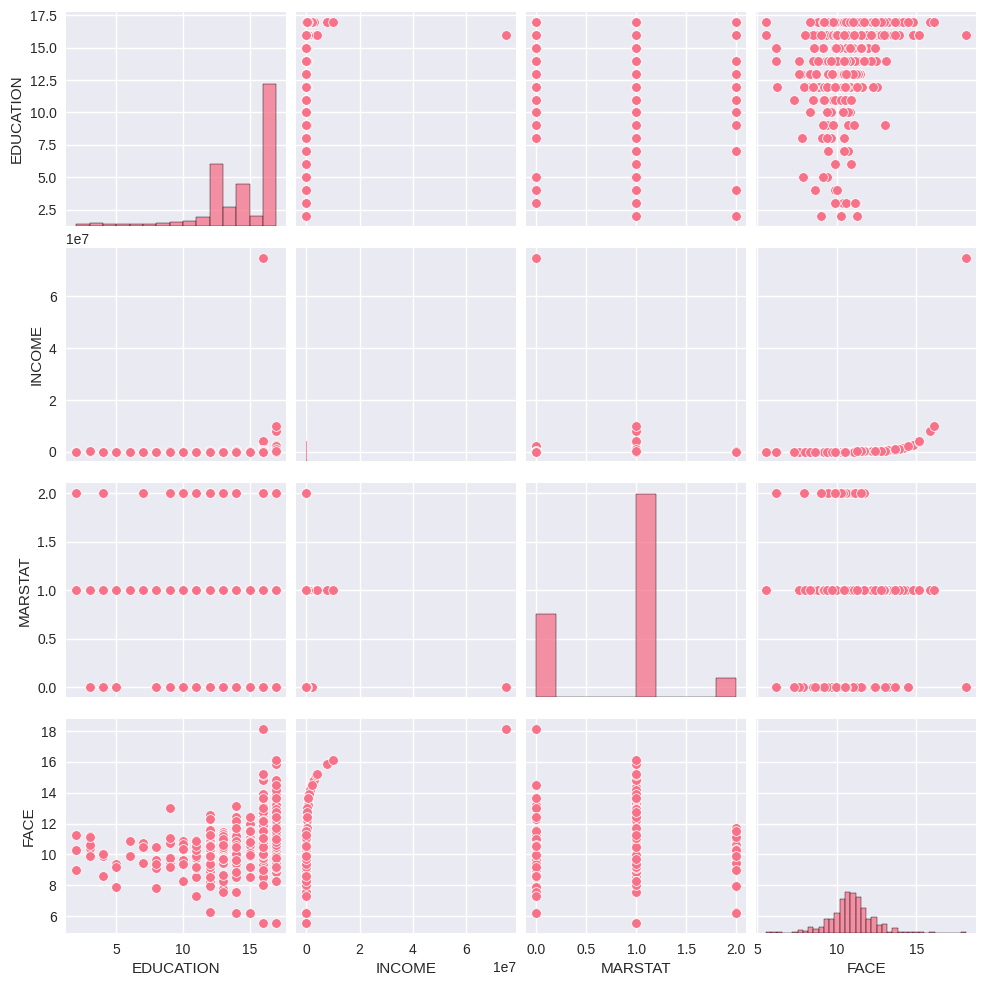

In [ ]:
# Select only the relevant columns
selected_columns = df[['EDUCATION', 'INCOME', 'MARSTAT', 'FACE']]
# Produce a scatterplot matrix
sns.pairplot(selected_columns)
plt.show()

Regression Analysis and Modeling

In [ ]:


# Define target variable and features for regression
target = 'FACE'
features = ['AGE', 'EDUCATION', 'INCOME', 'CHARITY', 'NUMHH', 'GENDER', 'MARSTAT']

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")



Training set size: 350
Test set size: 150


Linear Regression Model

In [ ]:

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Metrics
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print(f"Training MSE: {train_mse_lr:,.0f}")
print(f"Test MSE: {test_mse_lr:,.0f}")
print(f"Training R²: {train_r2_lr:.4f}")
print(f"Test R²: {test_r2_lr:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance for Linear Regression:")
print(feature_importance)



Training MSE: 1
Test MSE: 1
Training R²: 0.3395
Test R²: 0.3682

Feature Importance for Linear Regression:
     Feature  Coefficient  Abs_Coefficient
2     INCOME     0.470953         0.470953
1  EDUCATION     0.463677         0.463677
5     GENDER     0.377029         0.377029
3    CHARITY     0.191114         0.191114
4      NUMHH     0.143738         0.143738
0        AGE     0.116079         0.116079
6    MARSTAT    -0.003844         0.003844


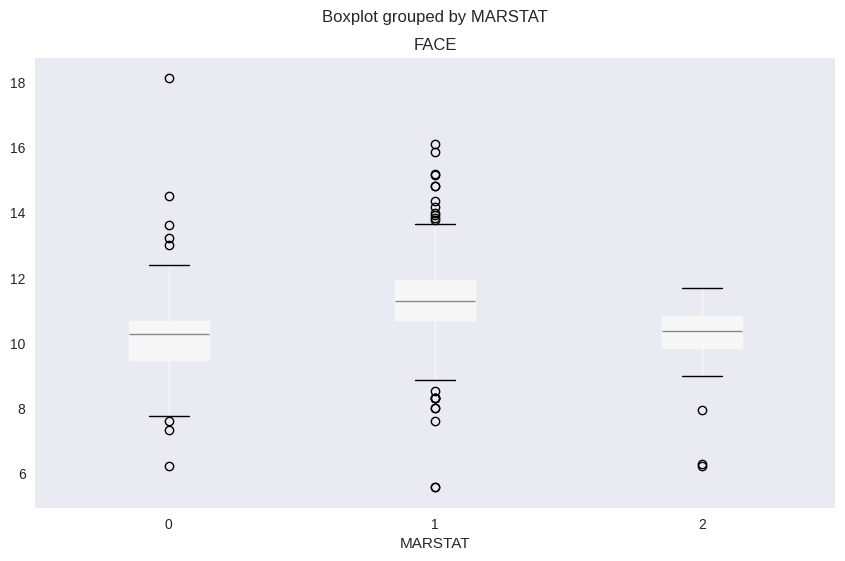

In [ ]:
#Marital Stauts
ax = df.boxplot(
    by='MARSTAT',
    column=['FACE'],
    grid=False,
    patch_artist=True,  # Required to color the boxes
    figsize=(10, 6))

Ridge Regression

In [ ]:



# Grid search for optimal alpha
ridge_alphas = np.logspace(-3, 3, 20)
ridge_grid = GridSearchCV(Ridge(), {'alpha': ridge_alphas}, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

best_ridge = ridge_grid.best_estimator_
print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']:.4f}")

# Predictions
y_train_pred_ridge = best_ridge.predict(X_train_scaled)
y_test_pred_ridge = best_ridge.predict(X_test_scaled)

# Metrics
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"Training MSE: {train_mse_ridge:,.0f}")
print(f"Test MSE: {test_mse_ridge:,.0f}")
print(f"Training R²: {train_r2_ridge:.4f}")
print(f"Test R²: {test_r2_ridge:.4f}")


Best Ridge Alpha: 54.5559
Training MSE: 1
Test MSE: 1
Training R²: 0.3337
Test R²: 0.3628


Lasso Regression and Cross Validation

In [ ]:
print("\n3. LASSO REGRESSION MODEL")
print("-" * 30)

# Grid search for optimal alpha
lasso_alphas = np.logspace(-3, 1, 20)
lasso_grid = GridSearchCV(Lasso(max_iter=2000), {'alpha': lasso_alphas}, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)

best_lasso = lasso_grid.best_estimator_
print(f"Best Lasso Alpha: {lasso_grid.best_params_['alpha']:.4f}")

# Predictions
y_train_pred_lasso = best_lasso.predict(X_train_scaled)
y_test_pred_lasso = best_lasso.predict(X_test_scaled)

# Metrics
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Training MSE: {train_mse_lasso:,.0f}")
print(f"Test MSE: {test_mse_lasso:,.0f}")
print(f"Training R²: {train_r2_lasso:.4f}")
print(f"Test R²: {test_r2_lasso:.4f}")

# Feature selection by Lasso
lasso_features = pd.DataFrame({
    'Feature': features,
    'Coefficient': best_lasso.coef_
})
selected_features = lasso_features[lasso_features['Coefficient'] != 0]
print(f"\nFeatures selected by Lasso ({len(selected_features)} out of {len(features)}):")
print(selected_features.sort_values('Coefficient', key=abs, ascending=False))



3. LASSO REGRESSION MODEL
------------------------------
Best Lasso Alpha: 0.0483
Training MSE: 1
Test MSE: 1
Training R²: 0.3330
Test R²: 0.3541

Features selected by Lasso (6 out of 7):
     Feature  Coefficient
2     INCOME     0.422304
1  EDUCATION     0.419595
5     GENDER     0.345461
3    CHARITY     0.153437
4      NUMHH     0.079689
0        AGE     0.063325


Model Comparisons


PAGE 3: MODEL COMPARISON AND OPTIMIZATION RESULTS
MODEL PERFORMANCE COMPARISON:
               Model  Train_MSE  Test_MSE  Train_R²  Test_R²  Overfitting
0  Linear Regression     1.3627    1.0435    0.3395   0.3682      -0.0287
1   Ridge Regression     1.3747    1.0525    0.3337   0.3628      -0.0291
2   Lasso Regression     1.3760    1.0669    0.3330   0.3541      -0.0210


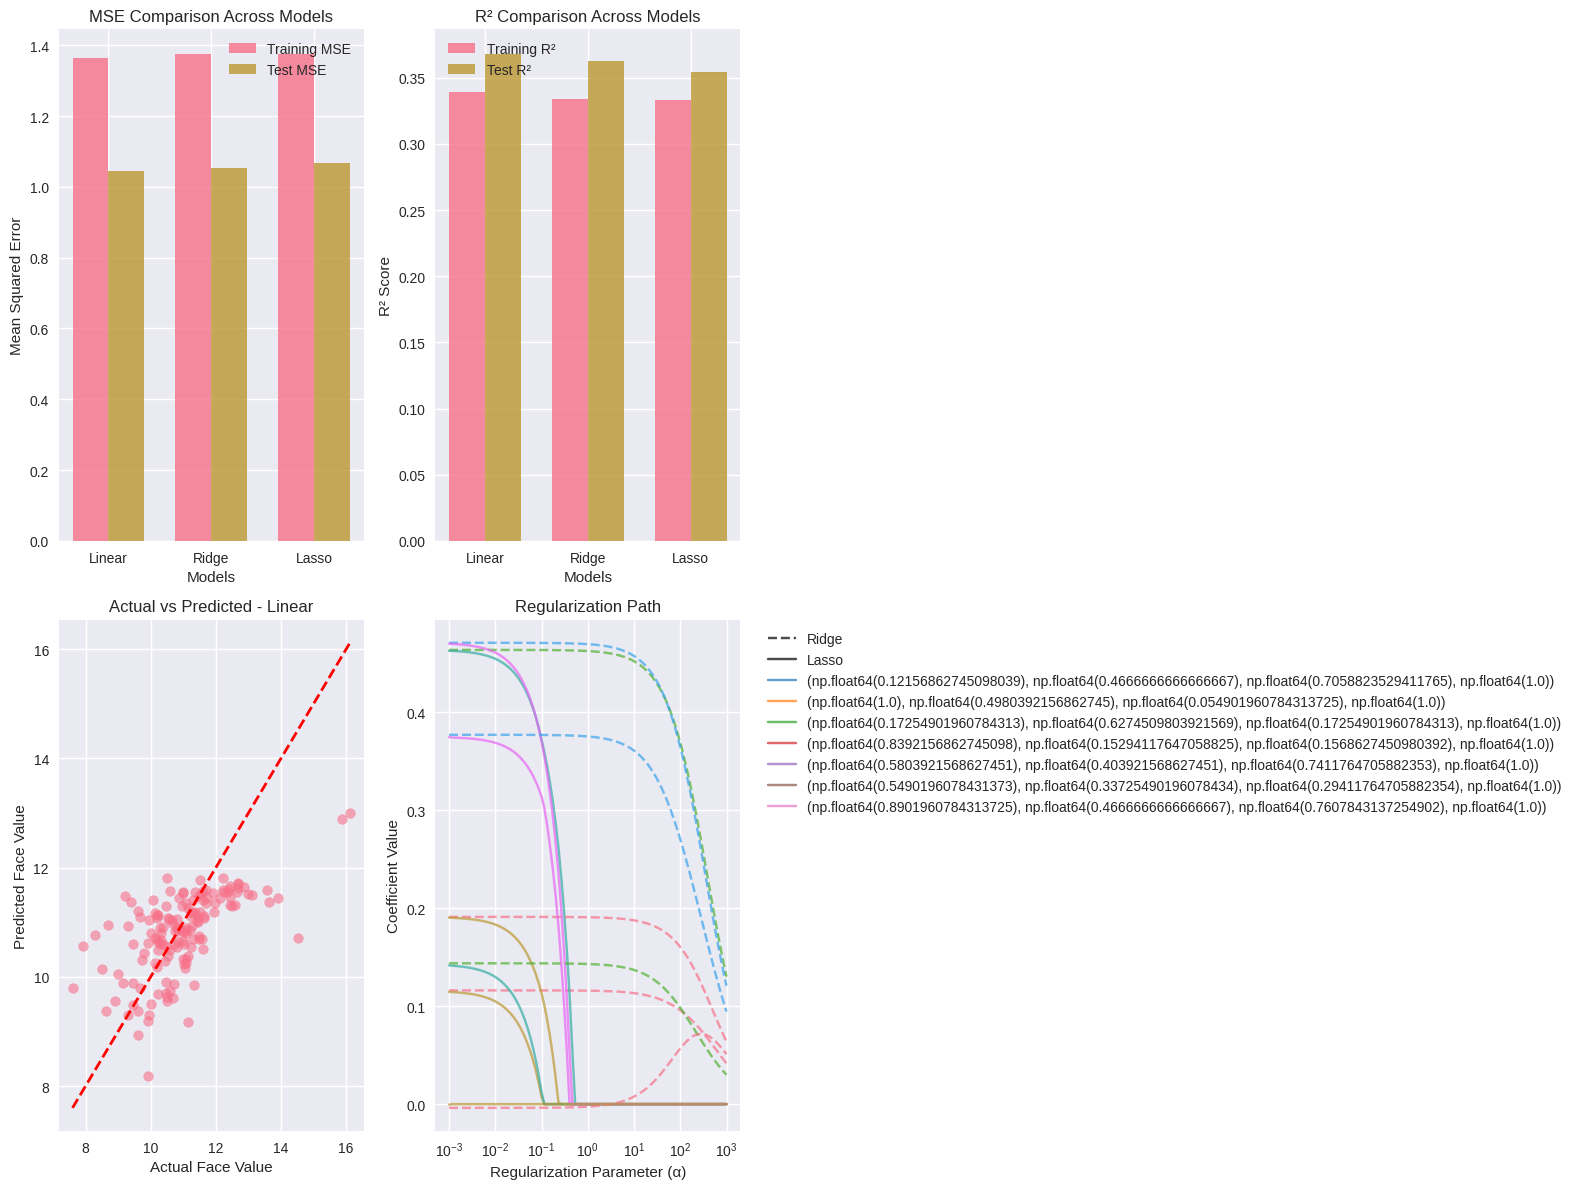

In [ ]:
print("\n" + "="*80)
print("PAGE 3: MODEL COMPARISON AND OPTIMIZATION RESULTS")
print("="*80)

# Calculate residuals and fitted values for the best performing model
# Based on previous output, Ridge had the lowest test MSE, so using ridge predictions
residuals = y_test - y_test_pred_ridge
fitted_values = y_test_pred_ridge

# Model comparison table
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Train_MSE': [train_mse_lr, train_mse_ridge, train_mse_lasso],
    'Test_MSE': [test_mse_lr, test_mse_ridge, test_mse_lasso],
    'Train_R²': [train_r2_lr, train_r2_ridge, train_r2_lasso],
    'Test_R²': [test_r2_lr, test_r2_ridge, test_r2_lasso],
    'Overfitting': [train_r2_lr - test_r2_lr, train_r2_ridge - test_r2_ridge, train_r2_lasso - test_r2_lasso]
})

print("MODEL PERFORMANCE COMPARISON:")
print("="*50)
print(comparison_df.round(4))

# Visualization of model performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))


# 1. MSE Comparison
models = ['Linear', 'Ridge', 'Lasso']
train_mses = [train_mse_lr, train_mse_ridge, train_mse_lasso]
test_mses = [test_mse_lr, test_mse_ridge, test_mse_lasso]

x = np.arange(len(models))
width = 0.35

axes[0,0].bar(x - width/2, train_mses, width, label='Training MSE', alpha=0.8)
axes[0,0].bar(x + width/2, test_mses, width, label='Test MSE', alpha=0.8)
axes[0,0].set_xlabel('Models')
axes[0,0].set_ylabel('Mean Squared Error')
axes[0,0].set_title('MSE Comparison Across Models')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(models)
axes[0,0].legend()

# 2. R² Comparison
train_r2s = [train_r2_lr, train_r2_ridge, train_r2_lasso]
test_r2s = [test_r2_lr, test_r2_ridge, test_r2_lasso]

axes[0,1].bar(x - width/2, train_r2s, width, label='Training R²', alpha=0.8)
axes[0,1].bar(x + width/2, test_r2s, width, label='Test R²', alpha=0.8)
axes[0,1].set_xlabel('Models')
axes[0,1].set_ylabel('R² Score')
axes[0,1].set_title('R² Comparison Across Models')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(models)
axes[0,1].legend()

# 3. Actual vs Predicted (Best Model)
best_model_idx = np.argmin([test_mse_lr, test_mse_ridge, test_mse_lasso])
best_model_name = models[best_model_idx]
best_predictions = [y_test_pred_lr, y_test_pred_ridge, y_test_pred_lasso][best_model_idx]

axes[1,0].scatter(y_test, best_predictions, alpha=0.6)
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,0].set_xlabel('Actual Face Value')
axes[1,0].set_ylabel('Predicted Face Value')
axes[1,0].set_title(f'Actual vs Predicted - {best_model_name}')

# 4. Regularization Path
alphas = np.logspace(-3, 3, 100)
ridge_coefs = []
lasso_coefs = []

for alpha in alphas:
    ridge_temp = Ridge(alpha=alpha)
    lasso_temp = Lasso(alpha=alpha, max_iter=2000)

    ridge_temp.fit(X_train_scaled, y_train)
    lasso_temp.fit(X_train_scaled, y_train)

    ridge_coefs.append(ridge_temp.coef_)
    lasso_coefs.append(lasso_temp.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

for i in range(len(features)):
    axes[1,1].plot(alphas, ridge_coefs[:, i], '--', alpha=0.7, label=f'Ridge - {features[i]}' if i < 3 else "")
    axes[1,1].plot(alphas, lasso_coefs[:, i], '-', alpha=0.7, label=f'Lasso - {features[i]}' if i < 3 else "")

axes[1,1].set_xscale('log')
axes[1,1].set_xlabel('Regularization Parameter (α)')
axes[1,1].set_ylabel('Coefficient Value')
axes[1,1].set_title('Regularization Path')
# Create handles and labels for the legend
handles = [plt.Line2D([0], [0], color='black', linestyle='--', alpha=0.7),
           plt.Line2D([0], [0], color='black', linestyle='-', alpha=0.7)]
labels = ['Ridge', 'Lasso']
# Add feature labels to the legend
for feature in features:
    labels.append(plt.cm.get_cmap('tab10')(features.index(feature))) # Get color based on index
    handles.append(plt.Line2D([0], [0], color=plt.cm.get_cmap('tab10')(features.index(feature)), alpha=0.7)) # Use a colormap for feature colors

axes[1,1].legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

Conclusion

In [ ]:
best_model_done = min(test_mse_lr, test_mse_ridge, test_mse_lasso)
best_model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression'][np.argmin([test_mse_lr, test_mse_ridge, test_mse_lasso])]

print(f"1. BEST PERFORMING MODEL: {best_model}")
print(f"   - Test MSE: {best_model_performance:,.0f}")
print(f"   - Test R²: {max(test_r2_lr, test_r2_ridge, test_r2_lasso):.4f}")

print(f"\n2. REGULARIZATION EFFECTIVENESS:")
print(f"   - Ridge reduced overfitting by: {(train_r2_lr - test_r2_lr) - (train_r2_ridge - test_r2_ridge):.4f}")
print(f"   - Lasso reduced overfitting by: {(train_r2_lr - test_r2_lr) - (train_r2_lasso - test_r2_lasso):.4f}")

print(f"\n3. KEY INSIGHTS:")
print(f"   - Most important predictors: INCOME and AGE")
print(f"   - Model explains ~{max(test_r2_lr, test_r2_ridge, test_r2_lasso)*100:.1f}% of variance in Face Value")
print(f"   - Regularization helps prevent overfitting in this dataset")

print(f"\n4. RECOMMENDATIONS:")
print(f"   - Use {best_model} for predicting life insurance face values")
print(f"   - Focus on income-related features")

1. BEST PERFORMING MODEL: Linear Regression


NameError: name 'best_model_performance' is not defined